In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/santosh/NetflixOriginals.csv
/kaggle/input/netflix-original-films-imdb-scores/NetflixOriginals.csv


In [5]:
nf = pd.read_csv("/kaggle/input/netflix-original-films-imdb-scores/NetflixOriginals.csv")
nf.head()

,Title,Genre,Premiere,Runtime,IMDB Score,Language
0,Enter the Anime,Documentary,"August 5, 2019",58,2.5,English/Japanese
1,Dark Forces,Thriller,"August 21, 2020",81,2.6,Spanish
2,The App,Science fiction/Drama,"December 26, 2019",79,2.6,Italian
3,The Open House,Horror thriller,"January 19, 2018",94,3.2,English
4,Kaali Khuhi,Mystery,"October 30, 2020",90,3.4,Hindi


In [6]:
nf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 584 entries, 0 to 583
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Title       584 non-null    object 
 1   Genre       584 non-null    object 
 2   Premiere    584 non-null    object 
 3   Runtime     584 non-null    int64  
 4   IMDB Score  584 non-null    float64
 5   Language    584 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 27.5+ KB


Data Pre-Processing

Text(0.5, 1.0, 'IMDB Score Distribution')

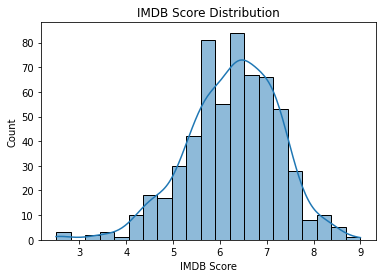

In [7]:
sns.histplot(data=nf, x="IMDB Score", kde=True).set_title('IMDB Score Distribution')

In [8]:
print(nf.Genre.nunique())
nf.Genre.unique()

115


array(['Documentary', 'Thriller', 'Science fiction/Drama',
       'Horror thriller', 'Mystery', 'Action', 'Comedy',
       'Heist film/Thriller', 'Musical/Western/Fantasy', 'Drama',
       'Romantic comedy', 'Action comedy', 'Horror anthology',
       'Political thriller', 'Superhero-Comedy', 'Horror',
       'Romance drama', 'Anime / Short', 'Superhero', 'Heist', 'Western',
       'Animation/Superhero', 'Family film', 'Action-thriller',
       'Teen comedy-drama', 'Romantic drama', 'Animation',
       'Aftershow / Interview', 'Christmas musical',
       'Science fiction adventure', 'Science fiction', 'Variety show',
       'Comedy-drama', 'Comedy/Fantasy/Family', 'Supernatural drama',
       'Action/Comedy', 'Action/Science fiction',
       'Romantic teenage drama', 'Comedy / Musical', 'Musical',
       'Science fiction/Mystery', 'Crime drama',
       'Psychological thriller drama', 'Adventure/Comedy', 'Black comedy',
       'Romance', 'Horror comedy', 'Christian musical',
       'Rom

In [10]:
print(nf.Language.nunique())
nf.Language.unique()


38


array(['English/Japanese', 'Spanish', 'Italian', 'English', 'Hindi',
       'Turkish', 'Korean', 'Indonesian', 'Malay', 'Dutch', 'French',
       'English/Spanish', 'Portuguese', 'Filipino', 'German', 'Polish',
       'Norwegian', 'Marathi', 'Thai', 'Swedish', 'Japanese',
       'Spanish/Basque', 'Spanish/Catalan', 'English/Swedish',
       'English/Taiwanese/Mandarin', 'Thia/English', 'English/Mandarin',
       'Georgian', 'Bengali', 'Khmer/English/French', 'English/Hindi',
       'Tamil', 'Spanish/English', 'English/Korean', 'English/Arabic',
       'English/Russian', 'English/Akan', 'English/Ukranian/Russian'],
      dtype=object)

Data Pre-Processing

In [12]:
def scoreing_clf(score):
    if score < 5:
        return "Low"
    elif score <= 5 and score <= 7:
        return "Middle"
    elif score > 7:
        return "High"

nf["scoreRange"] = nf["IMDB Score"].apply(scoreing_clf)

In [19]:
enre_score = nf[["Genre", "IMDB Score", "scoreRange"]]
genre_count = genre_score.groupby("Genre").count()["IMDB Score"].rename("count").sort_values(ascending=False).reset_index()

In [20]:
language_score = nf[["Language", "IMDB Score", "scoreRange"]]
language_count = language_score.groupby("Language").count()["IMDB Score"].rename("count").sort_values(ascending=False).reset_index()

In [21]:
runtime_score = nf[["Runtime", "IMDB Score", "scoreRange"]]

Question #1: Is there an Association between Genre and IMDB Score Range?
Test: Chi-square test.
Null Hypothesis  
H
0
 : The IMDB Score Range is independent of Genre.
Alternative Hypothesis  
H
1
 : The IMDB Score Range is associated with Genre.
Use α = 0.05

In [15]:
cont_table  = pd.crosstab(genre_score.Genre, genre_score.scoreRange)
cont_table

scoreRange,High,Low,Middle
Genre,,,
Action,0,3,0
Action comedy,0,1,0
Action-adventure,1,0,0
Action-thriller,0,0,1
Aftershow / Interview,2,0,0
Animation,3,0,0
Animation / Science Fiction,1,0,0
Animation / Short,2,0,0
Animation/Christmas/Comedy/Adventure,1,0,0


In [16]:
X2, p_value, degree_freedom, expected_values = scipy.stats.chi2_contingency(cont_table, correction = True)
print("X2: {0}, P-Value: {1}".format(X2,p_value))


X2: 180.26013916396712, P-Value: 5.361881405495727e-08


Conclusion: Since the p-value is less than 0.05, we will reject the null hypothesis as there is significant evidence that IMDB Score Range is associated with genre.

Question #2: Is there an Association between Languages and IMDB Score Range?
Test: Chi-square test.
Null Hypothesis  
H
0
 : The IMDB Score Range is independent of Language.
Alternative Hypothesis  
H
1
 : The IMDB Score Range is associated with Language.
Use α = 0.05

In [22]:
cont_table  = pd.crosstab(language_score.Language, language_score.scoreRange)
cont_table

scoreRange,High,Low,Middle
Language,,,
Bengali,1,0,0
Dutch,1,1,0
English,102,24,2
English/Akan,1,0,0
English/Arabic,1,0,0
English/Hindi,2,0,0
English/Japanese,0,1,0
English/Korean,1,0,0
English/Mandarin,1,0,0


In [23]:
X2, p_value, degree_freedom, expected_values = scipy.stats.chi2_contingency(cont_table, correction = True)
print("X2: {0}, P-Value: {1}".format(X2,p_value))

X2: 97.8274575327207, P-Value: 0.0002442472009070132


Conclusion: Since the p-value is less than 0.05, we will reject the null hypothesis as there is significant evidence that IMDB Score Range is associated with language.



Question #3: Is IMDB Score for Films correlated with Runtime?
Test: Pearson correlation test.
Null Hypothesis  
H
0
 : IMDB score for films is not correlated with runtime.
Alternative Hypothesis  
H
1
 : IMDB score for films is correlated with runtime.
Use α = 0.05

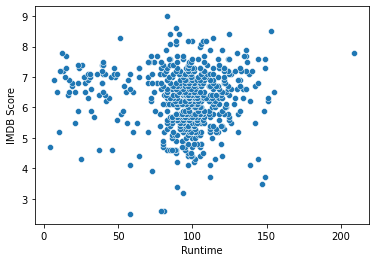

In [24]:
ax = sns.scatterplot(x="Runtime", y="IMDB Score", data=runtime_score)

In [25]:
r, p_value = scipy.stats.pearsonr(runtime_score['Runtime'], runtime_score['IMDB Score']) 
print("Pearson’s correlation coefficient: {0}, P-Value: {1}".format(r,p_value))

Pearson’s correlation coefficient: -0.0408962914207887, P-Value: 0.32383932911461244


Conclusion: Since the two-tailed p-value is greater than 0.05, we cannot reject the null hypothesis and conclude that there does not exist a relationship between runtime and teaching IMDB score.